# Visualizing ICLR submissions

## 2023 submissions

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib as mpl

import requests

In [2]:
# thanks to: https://medium.com/@jasonskessler/how-to-write-a-persuasive-iclr-review-visualizing-the-iclr-2018-review-data-set-a035bf89a946

url = 'https://api.openreview.net/notes?invitation=ICLR.cc%2F2023%2FConference%2F-%2FBlind_Submission'

titles = []
abstracts = []

for offset in [0,1000,2000,3000,4000]:
    print('.', end='')
    df = pd.DataFrame(requests.get(url + f'&offset={offset}').json()['notes'])
    if len(df) > 0:
        titles    += [d['title'].strip() for d in df['content'].values]
        abstracts += [d['abstract'].strip() for d in df['content'].values]
print('')

len(titles)

.....


4967

In [3]:
# Most frequent words in the titles (at least 5 letters)

words, counts = np.unique(' '.join(titles).split(), return_counts=True)
ind = np.argsort(counts)[::-1][:50]
for i in ind:
    if len(words[i]) >= 5: 
        print(f'{words[i]:20} {counts[i]:4}')

Learning             1412
Neural                509
Networks              319
Models                308
Graph                 269
Reinforcement         251
Representation        180
Training              168
Federated             168
Language              167
Model                 165
Efficient             159
Adversarial           159
Optimization          143
Image                 142
Contrastive           132
Network               125
Generalization        124
Robust                124
Towards               119
Detection             116
Representations       113
Generation            113
Transformer           101
learning              101
Domain                100
using                  97
Transformers           91
Classification         91
Framework              90
Knowledge              90
Robustness             86


In [4]:
# TF-IDF (with log-scaling)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True)
tfidf_features = vectorizer.fit_transform(abstracts)

tfidf_features.shape

(4967, 20124)

In [5]:
# SVD (omitting for now)

# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=300, random_state=42, algorithm='arpack')
# svd_data = svd.fit_transform(tfidf_features)

In [6]:
# t-SNE

from openTSNE import TSNE

Z = TSNE(verbose=True, neighbors='exact', initialization='spectral', 
         random_state=42).fit(tfidf_features)

--------------------------------------------------------------------------------
TSNE(initialization='spectral', neighbors='exact', random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 2.62 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.19 seconds
===> Calculating spectral initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=413.92 for 250 iterations...
Iteration   50, KL divergence 3.9970, 50 iterations in 1.0543 sec
Iteration  100, KL divergence 3.7249, 50 iterations in 0.6593 sec
Iteration  150, KL divergence 3.7832, 50 iterations in 0.7080 sec
Iteration  200, KL divergence 3.7891, 50 iterations in 0.6701 sec
Iteration  250, KL divergence 3.7269, 50 iterations in 0.6251 sec
   --> Time elapsed: 3.72 seconds
===> Running optimization with exaggerati

<IPython.core.display.Javascript object>


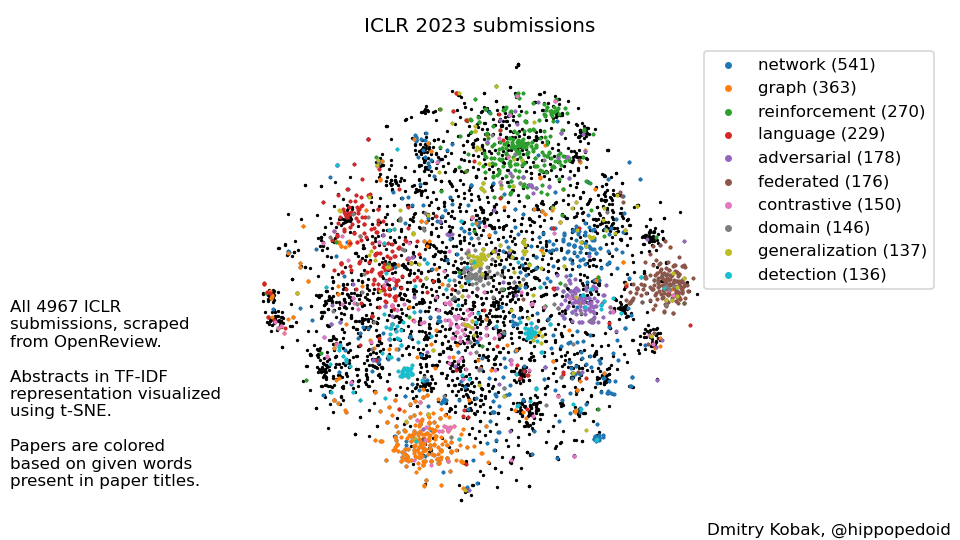

In [7]:
fig = plt.figure(figsize=(8,4.5))
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1], s=1, c='k')
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)

keywords = ['network', 'graph', 'reinforcement', 'language', 'adversarial', 
            'federated','contrastive', 'domain', 'generalization', 'detection']

# keywords = ['network', 'graph', 'reinforcement', 'language', 'adversarial', 
#             'federated','contrastive', 'domain', 'generalization', 'audio']

for keyword in keywords:
    ind = [i for i,t in enumerate(titles) if keyword.lower() in t.lower()]
    plt.scatter(Z[ind,0], Z[ind,1], s=2, label = f'{keyword} ({len(ind)})')
    
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([10])
    
plt.title(f'ICLR 2023 submissions')
plt.tight_layout()

fig.text(.01,.1, 
        f'''All {len(titles)} ICLR\nsubmissions, '''
        '''scraped\nfrom OpenReview.\n\n'''
        '''Abstracts in TF-IDF\nrepresentation '''
        '''visualized\nusing t-SNE.\n\n'''
        '''Papers are colored\nbased '''
        '''on given words\npresent '''
        '''in paper titles.''');

fig.text(.99, .01, 'Dmitry Kobak, @hippopedoid', ha='right')

plt.savefig('iclr.png', dpi=200)

In [8]:
# UMAP

from umap import UMAP

U = UMAP(verbose=True).fit_transform(tfidf_features)

UMAP( verbose=True)
Sat Oct  1 18:24:07 2022 Construct fuzzy simplicial set
Sat Oct  1 18:24:07 2022 Finding Nearest Neighbors
Sat Oct  1 18:24:07 2022 Building RP forest with 9 trees
Sat Oct  1 18:24:07 2022 metric NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	Stopping threshold met -- exiting after 7 iterations
Sat Oct  1 18:24:20 2022 Finished Nearest Neighbor Search
Sat Oct  1 18:24:22 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Oct  1 18:24:27 2022 Finished embedding


<IPython.core.display.Javascript object>


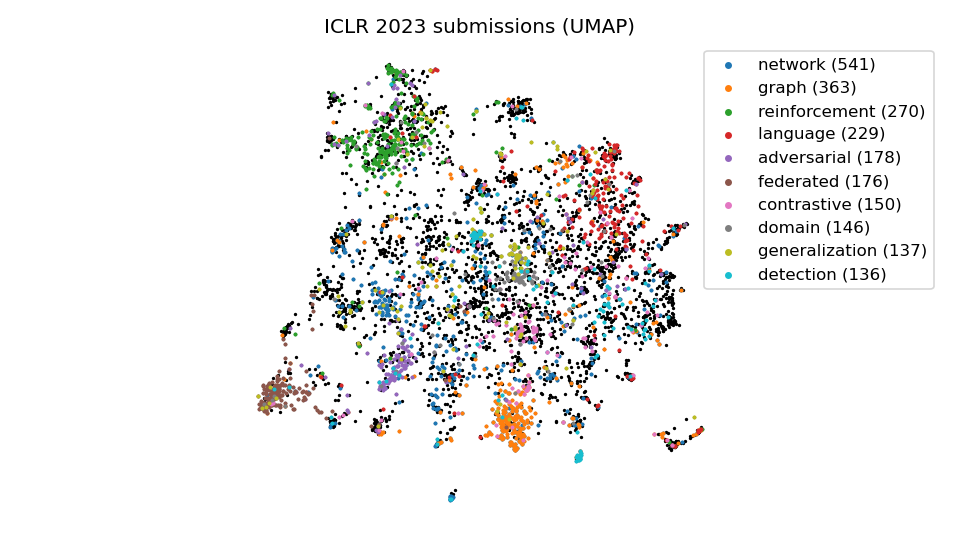

In [9]:
fig = plt.figure(figsize=(8,4.5))
plt.axis('equal')
plt.scatter(U[:,0], U[:,1], s=1, c='k')
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)

keywords = ['network', 'graph', 'reinforcement', 'language', 'adversarial', 
            'federated','contrastive', 'domain', 'generalization', 'detection']

for keyword in keywords:
    ind = [i for i,t in enumerate(titles) if keyword.lower() in t.lower()]
    plt.scatter(U[ind,0], U[ind,1], s=2, label = f'{keyword} ({len(ind)})')
    
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([10])
    
plt.title(f'ICLR 2023 submissions (UMAP)')
plt.tight_layout()

plt.savefig('iclr-umap.png', dpi=200)

## All years together

In [10]:
# Download data

titles = []
abstracts = []
years = []

for year in [2018,2019,2020,2021,2022,2023]:
    url = f'https://api.openreview.net/notes?invitation=ICLR.cc%2F{year}%2FConference%2F-%2FBlind_Submission'
    for offset in [0,1000,2000,3000,4000]:
        print('.', end='')
        df = pd.DataFrame(requests.get(url + f'&offset={offset}').json()['notes'])
        if len(df) > 0:
            titles    += [d['title'].strip() for d in df['content'].values]
            abstracts += [d['abstract'].strip() for d in df['content'].values]
            years += [year] * len(df)
print('')

years = np.array(years)

len(titles)

..............................


14733

In [11]:
# TF-IDF

vectorizer = TfidfVectorizer(sublinear_tf=True)
tfidf_features = vectorizer.fit_transform(abstracts)

In [12]:
# t-SNE

Zall = TSNE(verbose=True, neighbors='exact', initialization='spectral', random_state=42).fit(tfidf_features)

--------------------------------------------------------------------------------
TSNE(initialization='spectral', neighbors='exact', random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 18.12 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.52 seconds
===> Calculating spectral initialization...
   --> Time elapsed: 0.21 seconds
===> Running optimization with exaggeration=12.00, lr=1227.75 for 250 iterations...
Iteration   50, KL divergence 5.7190, 50 iterations in 1.6808 sec
Iteration  100, KL divergence 5.7190, 50 iterations in 1.7368 sec
Iteration  150, KL divergence 5.7190, 50 iterations in 1.6816 sec
Iteration  200, KL divergence 5.7190, 50 iterations in 1.6839 sec
Iteration  250, KL divergence 5.7190, 50 iterations in 1.6658 sec
   --> Time elapsed: 8.45 seconds
===> Running optimization with exaggera

In [13]:
# UMAP

Uall = UMAP(verbose=True).fit_transform(tfidf_features)

UMAP( verbose=True)
Sat Oct  1 18:26:15 2022 Construct fuzzy simplicial set
Sat Oct  1 18:26:15 2022 Finding Nearest Neighbors
Sat Oct  1 18:26:15 2022 Building RP forest with 11 trees
Sat Oct  1 18:26:18 2022 metric NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	Stopping threshold met -- exiting after 8 iterations
Sat Oct  1 18:26:30 2022 Finished Nearest Neighbor Search
Sat Oct  1 18:26:30 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Sat Oct  1 18:26:36 2022 Finished embedding


<IPython.core.display.Javascript object>


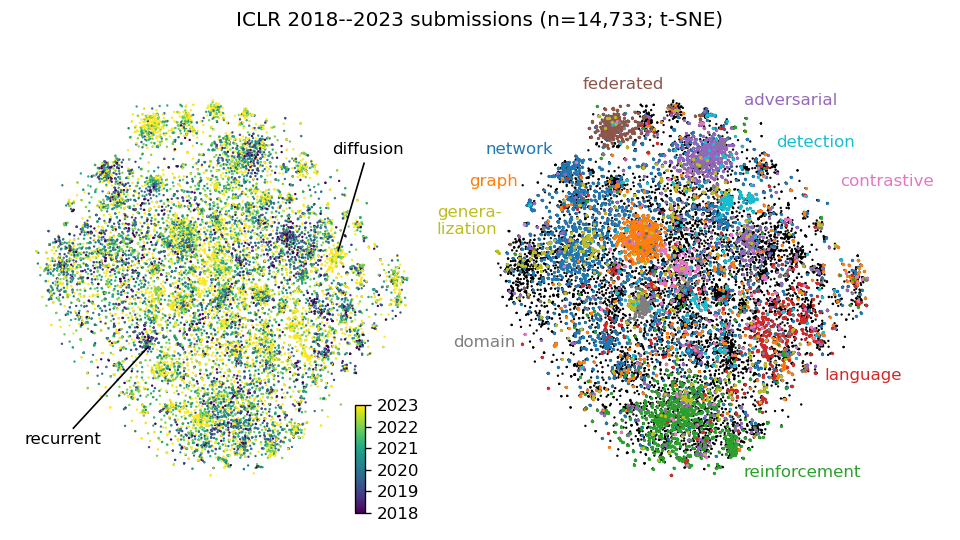

/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [14]:
fig = plt.figure(figsize=(8,4.5))

ax1 = plt.subplot(121)
plt.axis('equal')
ind = np.random.permutation(Zall.shape[0])
plt.scatter(Zall[ind,0], Zall[ind,1], s=2, c=years[ind], ec='none')
plt.xticks([])
plt.yticks([])

plt.text(-60,-50,'recurrent')
plt.plot([-45,-22], [-45,-20], c='k', lw=1)
plt.text(35,40,'diffusion')
plt.plot([45,37], [37,10], c='k', lw=1)


axclb = plt.axes([.37,.05,.01,.2])
plt.colorbar(ax=ax1, cax=axclb, ticks=[2018,2019,2020,2021,2022,2023])

ax2 = plt.subplot(122)
plt.axis('equal')
plt.scatter(Zall[:,0], Zall[:,1], s=2, c='k', ec='none')
plt.xticks([])
plt.yticks([])

keywords = ['network', 'graph', 'reinforcement', 'language', 'adversarial', 
            'federated','contrastive', 'domain', 'generalization', 'detection']

for keyword in keywords:
    ind = [i for i,t in enumerate(titles) if keyword.lower() in t.lower()]
    plt.scatter(Zall[ind,0], Zall[ind,1], s=1, label = f'{keyword} ({len(ind)})')
    
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.text(-60,40,'network',c=cols[0])
plt.text(-65,30,'graph',c=cols[1])
plt.text(20,-60,'reinforcement',c=cols[2])
plt.text(45,-30,'language',c=cols[3])
plt.text(20,55,'adversarial',c=cols[4])
plt.text(-30,60,'federated',c=cols[5])
plt.text(50,30,'contrastive',c=cols[6])
plt.text(-70,-20,'domain',c=cols[7])
plt.text(-75,15,'genera-\nlization',c=cols[8])
plt.text(30,42,'detection',c=cols[9])
    
sns.despine(left=True, bottom=True)
plt.suptitle(f'ICLR 2018--2023 submissions (n={Zall.shape[0]:,}; t-SNE)')
plt.tight_layout()
plt.savefig('iclr-all.png', dpi=200)

<IPython.core.display.Javascript object>


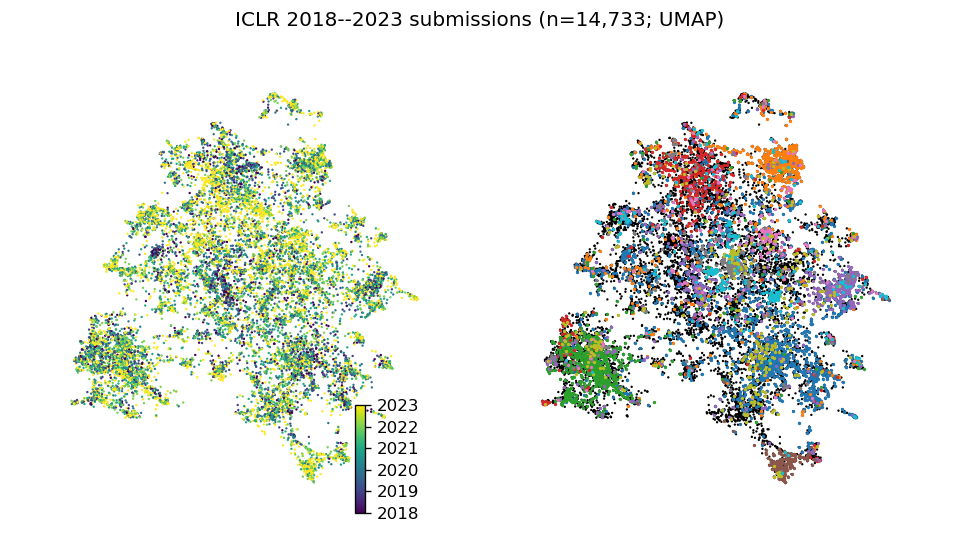

/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [17]:
fig = plt.figure(figsize=(8,4.5))

ax1 = plt.subplot(121)
plt.axis('equal')
ind = np.random.permutation(Uall.shape[0])
plt.scatter(Uall[ind,0], Uall[ind,1], s=2, c=years[ind], ec='none')
plt.xticks([])
plt.yticks([])

axclb = plt.axes([.37,.05,.01,.2])
plt.colorbar(ax=ax1, cax=axclb, ticks=[2018,2019,2020,2021,2022,2023])

ax2 = plt.subplot(122)
plt.axis('equal')
plt.scatter(Uall[:,0], Uall[:,1], s=2, c='k', ec='none')
plt.xticks([])
plt.yticks([])

keywords = ['network', 'graph', 'reinforcement', 'language', 'adversarial', 
            'federated','contrastive', 'domain', 'generalization', 'detection']

for keyword in keywords:
    ind = [i for i,t in enumerate(titles) if keyword.lower() in t.lower()]
    plt.scatter(Uall[ind,0], Uall[ind,1], s=1, label = f'{keyword} ({len(ind)})')
    
sns.despine(left=True, bottom=True)
plt.suptitle(f'ICLR 2018--2023 submissions (n={Zall.shape[0]:,}; UMAP)')
plt.tight_layout()
plt.savefig('iclr-all-umap.png', dpi=200)

<IPython.core.display.Javascript object>


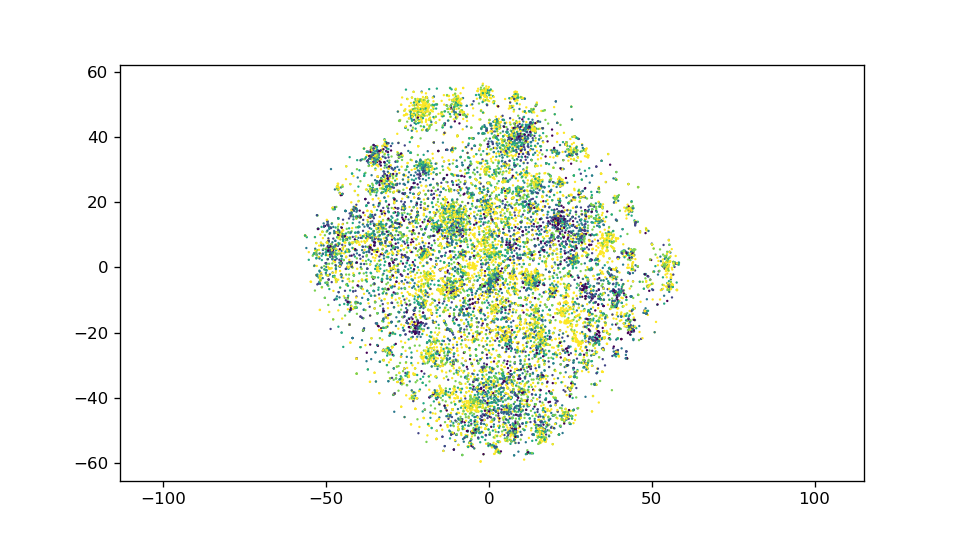

Diffusion   69
Models   42
Denoising   17


In [16]:
# Inspect a given cluster

fig = plt.figure(figsize=(8,4.5))
plt.axis('equal')
ind = np.random.permutation(Zall.shape[0])
plt.scatter(Zall[ind,0], Zall[ind,1], s=2, c=years[ind], ec='none')
tit = np.array(titles)

box = [-30, -14, -22, -14]
box = [32, 40, 4, 10]
subset = (Zall[:,0]>box[0]) & (Zall[:,0]<box[1]) & (Zall[:,1]>box[2]) & (Zall[:,1]<box[3])
# for t in tit[subset]:
#     print(t)

words, counts = np.unique(' '.join(tit[subset]).split(), return_counts=True)
ind = np.argsort(counts)[::-1][:5]
for i in ind:
    if len(words[i]) >= 5:
        print(f'{words[i]:5} {counts[i]:4}')